# k-Nearest-Neighbors (k-NN) Model with Scikit-learn

k-Nearest-Neighbors (k-NN) is a supervised machine learning model. 

k-NN models work by taking a data point and looking at the ‘k’ closest labeled data points. The data point is then assigned the label of the majority of the ‘k’ closest points.


## Pima Indians Diabetes Database

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.
The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Ref: (https://www.kaggle.com/uciml/pima-indians-diabetes-database)




### Import required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data set
df = pd.read_csv("/Users/divu/Desktop/dataset/diabetes.csv")

### Data Exploration

In [3]:
#explore dataset
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#check number of rows and columns in dataset
df.shape

(768, 9)

In [5]:
# Undertand the variables
df.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Data Visualization

Plotting histograms of the variables to understand the data better.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b95e470>,
      dtype=object)

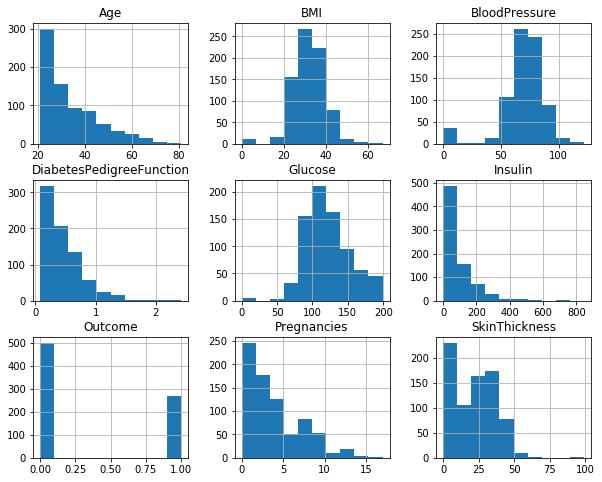

In [7]:
df.hist(figsize = (10,8))

### Outcome Variable



In [8]:
df.groupby("Outcome").size()


Outcome
0    500
1    268
dtype: int64

### Histograms based on outcome variables



Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

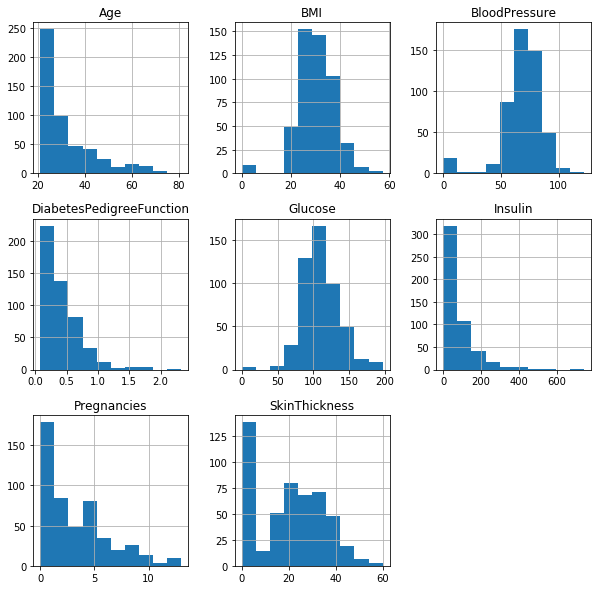

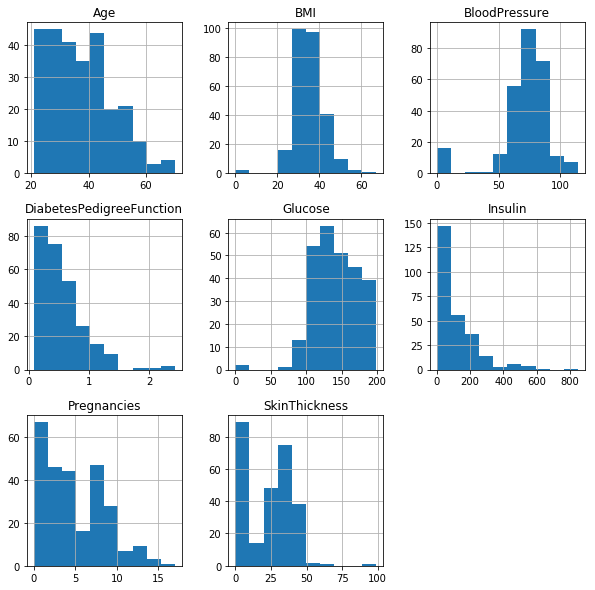

In [9]:
df.groupby("Outcome").hist(figsize=(10,10))


### Data Cleaning
* Duplicate or irrelevant observations.
* Bad labeling of data, same category occurring multiple times.
* Missing or null data points.
* Unexpected outliers



### Missing or Null Data points

In [10]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Unexpected Outliers

* 0 values for blood pressure,Glucose,SkinThickness,Insulin,BMI
 
 
To handle invalid data values:
* Ignore values
* Average or Mean values
* Avoid the variables.


In [11]:
print("Total : {}".format(df[df.BloodPressure == 0].shape[0]))

Total : 35


In [12]:
print("Grouping by : {}".format(df[df.BloodPressure == 0].groupby('Outcome')['Age'].count()))

Grouping by : Outcome
0    19
1    16
Name: Age, dtype: int64


In [13]:
print("Total : {}".format(df[df.Glucose == 0].shape[0]))

Total : 5


In [14]:
print("Grouping by : {}".format(df[df.Glucose == 0].groupby('Outcome')['Age'].count()))

Grouping by : Outcome
0    3
1    2
Name: Age, dtype: int64


In [15]:
print("Total : {}".format(df[df.SkinThickness == 0].shape[0]))

Total : 227


In [16]:
print("Grouping by : {}".format(df[df.SkinThickness == 0].groupby('Outcome')['Age'].count()))

Grouping by : Outcome
0    139
1     88
Name: Age, dtype: int64


In [17]:
print("Total : {}".format(df[df.Insulin  == 0].shape[0]))

Total : 374


In [18]:
print("Grouping by : {}".format(df[df.Insulin == 0].groupby('Outcome')['Age'].count()))

Grouping by : Outcome
0    236
1    138
Name: Age, dtype: int64


In [19]:
print("Total : {}".format(df[df.BMI  == 0].shape[0]))

Total : 11


In [20]:
print("Grouping by : {}".format(df[df.BMI == 0].groupby('Outcome')['Age'].count()))

Grouping by : Outcome
0    9
1    2
Name: Age, dtype: int64


##### Remove the rows which the “BloodPressure”, “BMI” and “Glucose”  etc are zero.



In [21]:
df_mod = df[(df.BloodPressure != 0) & (df.BMI != 0) & (df.Glucose != 0) & (df.Insulin != 0) & (df.SkinThickness != 0)]
print("Rows and columns : {}".format(df_mod.shape))

Rows and columns : (392, 9)


### Defining input and target variables





In [22]:
#create a dataframe with all training data except the target column. 
X = df_mod.drop(['Outcome'],axis=1)

#separate target values 
y = df_mod['Outcome'].values

In [23]:
#check that the target variable has been removed
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
6,3,78,50,32,88,31.0,0.248,26
8,2,197,70,45,543,30.5,0.158,53
13,1,189,60,23,846,30.1,0.398,59


### Split the dataset into train and test data

* Split the dataset into into training data and testing data.
* Scikit-learn function ‘train_test_split’ is used to split our dataset into training and testing data.
* Setting random_state will ensure uniform output.
* Stratify is used to split the labels so that they are distributed in the training and test sets as they are in the original dataset.




In [24]:
# Import libraries
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split ,cross_val_score,GridSearchCV



In [25]:
#split dataset into train and test data using the intial dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

### Building and training the model


In [26]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=3) 

In [27]:
# Fit the classifier 
knn.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

### Testing the model


In [28]:
#show predictions on the test data
knn.predict(X_test)

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [29]:
#check accuracy of our model on the test data
knn.score(X_test,y_test)

0.7088607594936709


### k-Fold Cross-Validation

* Split the dataset into k subsets.
* Use one of the k sub set as testing set and k-1 sets as training set.
* Repeat this untill all subsets have been used as testing and training set.
* Model accuracy is calculated as an average of all the models.

![title](../../Desktop/dataset/img/crossvalidation.jpeg)

Image Credits: www.datacamp.com

In [30]:
#create a new KNN model
knn2 = KNeighborsClassifier()

#train model with cv of 5 
cv_score = cross_val_score(knn,X,y,cv=5)

#print each cv score (accuracy) and average them
print(cv_score)
print("cv_score mean:{0:8.2f}".format(np.mean(cv_score)))

[0.67088608 0.64556962 0.76923077 0.75641026 0.73076923]
cv_score mean:    0.71


###  Cross validation increases the model accuracy from 70%  to 71%.

### GridSearchCV
* k - Hyperparameter
* GridSearchCV - helps optimize the value of k.



In [31]:
from sklearn.model_selection import GridSearchCV

#create new a knn model
knn3 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn3, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [32]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 20}

In [33]:
#check mean score for the top performing value of n_neighbors
print("best accuracy{0:8.2f}".format(knn_gscv.best_score_))

best accuracy    0.76


## Cross validation & GridsearchCv increases the model accuracy from 70%  to 76%.